## Module 2 - Dimensionality Reduction: Thresholds and PCA

**Components in this Project:**
- Data Wrangling: ABT
- <span style="color:royalblue">Dimensionality Reduction: Thresholds and PCA</span>
- Cluster Analysis

Kairong Chen

Lasted edited: 02/06/2022


This module includes:
1. Dimensionality Reduction With keeping the popular items
2. Dimensionality Reduction With PCA

In [1]:
%load_ext nb_black

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

pd.set_option("display.max_columns", 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

sns.set_style("darkgrid")

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# Read cleaned_transactions.csv
tx_df = pd.read_csv("cleaned_transactions.csv")

tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


<IPython.core.display.Javascript object>

In [3]:
# Get item_dummies
item_dummies = pd.get_dummies(tx_df.StockCode)

# Add CustomerID to item_dummies
item_dummies["CustomerID"] = tx_df.CustomerID

# Display first 5 rows of item_dummies
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583


<IPython.core.display.Javascript object>

In [4]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby("CustomerID").sum()

# Display first 5 rows of item_data
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


<IPython.core.display.Javascript object>

In [5]:
# Save item_data.csv
item_data.to_csv("item_data.csv")

<IPython.core.display.Javascript object>

### Reduce the dimensionality of this item data by setting a threshold for keeping features

In [6]:
# Total times each item was purchased
item_data.sum()

10002       12
10120        1
10125       13
10133        5
10135        4
          ... 
90202D       1
90204        1
C2           6
M           34
POST      1055
Length: 2574, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
# Display most popular 20 items
item_data.sum().sort_values().tail(20)

22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(20).index

print(top_20_items)

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')


<IPython.core.display.Javascript object>

In [9]:
# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape


(414, 20)

<IPython.core.display.Javascript object>

In [10]:
# Save threshold_item_data.csv
top_20_item_data.to_csv("threshold_item_data.csv")

<IPython.core.display.Javascript object>

### Item Data PCA

In [11]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
print(item_data_scaled[:5])

[[-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.68068072]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
   0.38776219]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848  5.53128397
   0.65487292]]


<IPython.core.display.Javascript object>

In [12]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
print(PC_items[:5])

[[ 5.87614052e+00  4.82891689e+00 -4.95545069e-01 ... -6.62646278e-04
  -4.43629806e-05  2.05512690e-14]
 [-4.21983747e+00  1.22621722e+00 -1.88191211e+00 ... -2.11471782e-04
  -2.69154340e-04 -5.82129830e-15]
 [-1.26084676e+00  2.38766371e+00 -7.31483440e-02 ...  2.57750179e-04
  -2.05682324e-04 -4.64212002e-15]
 [-4.92931983e+00 -7.14858724e-01 -1.58093026e+00 ... -1.98603886e-03
   9.92316312e-05  5.12784259e-15]
 [-2.05311348e+00  2.11095022e+00  1.84807021e-01 ... -3.43415269e-04
  -1.32981672e-04  6.32827124e-15]]


<IPython.core.display.Javascript object>

In [13]:
# Sum of explained variance ratio
pca.explained_variance_ratio_.sum()

1.0

<IPython.core.display.Javascript object>

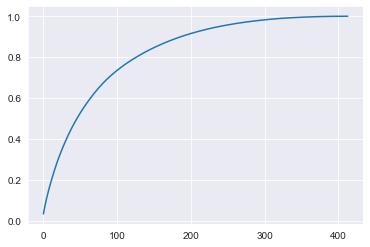

<IPython.core.display.Javascript object>

In [14]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.show()

In [15]:
# How much variance we'd capture with the first 125 components
print(cumulative_explained_variance[124])

0.7955069032205402


<IPython.core.display.Javascript object>

Reducing 2574 features down to 125 (about 95% fewer features) while capturing almost 80% of the original variance is certainly not bad!

In [16]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

<IPython.core.display.Javascript object>

In [17]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ["PC{}".format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876143,4.828924,-0.495542,3.093871,-0.633796,-11.534026,2.162012,7.116931,5.336023,4.424444,4.637210,2.316453,12.310725,1.986652,-11.431214,5.617538,-2.177422,7.666221,-12.136068,-16.049567,-5.949052,7.813827,40.518204,-35.575355,-17.557761,6.866683,20.886529,2.296197,-26.160154,-32.582627,7.880016,12.358168,6.823337,-32.962697,-4.387701,-17.238922,-11.265876,-14.488047,-2.762787,4.736450,-6.982936,-1.464942,10.605717,1.244958,3.078411,5.344288,-0.407711,1.670688,-6.362205,3.064186,...,2.154229,2.529344,-1.010386,-1.573436,-2.044982,1.288436,0.577029,-1.435833,-1.923360,-3.701580,0.548512,-1.732911,0.618747,0.126294,1.127582,1.670173,-1.188258,-0.294102,-0.378313,0.496367,-0.700005,-0.123394,0.060517,0.444002,0.040681,-1.041543,1.334707,0.325873,-0.466788,0.008986,-0.316717,0.307717,0.904353,0.931433,-0.327745,0.175326,-1.091834,-0.114662,-0.610080,0.380216,0.847666,-0.068565,0.249405,0.732106,0.253066,0.414491,0.433207,-0.184232,-0.011370,0.060000
12348,-4.219841,1.226182,-1.881899,-0.174348,0.817991,1.160793,-0.871883,-0.846789,0.460397,0.854740,-0.401585,0.981652,-1.103533,0.769891,-0.092671,-0.313182,-0.448193,1.207361,0.382769,-0.469448,0.185687,0.054913,0.500740,0.373193,1.225203,-0.774198,-0.269818,0.847294,-0.370734,-0.573504,1.008292,-0.578211,0.953315,-0.734808,0.353284,-0.392512,-0.302067,0.396419,0.158758,0.334565,-0.462311,0.707035,1.198032,-0.206792,-0.869348,-0.050644,-0.420188,-1.610530,-0.401756,0.451301,...,-1.023557,-0.869696,-0.428100,-0.350631,-0.069592,0.152997,-0.811224,-0.378954,0.706270,0.154980,0.094761,0.028404,-1.849830,0.036814,-0.309211,0.963183,-0.642631,0.605457,-0.745214,0.802168,-0.062801,-0.345058,1.375357,0.875521,0.610415,1.253714,0.673406,-0.519327,1.883065,0.311472,-1.879884,-0.911823,-0.581239,-1.061872,-0.698603,0.530849,1.434414,-0.472594,1.550409,-1.017050,-1.423409,-0.275701,-1.588875,1.482724,-1.461437,-1.053821,-1.913785,-0.398764,0.248685,-0.196434
12349,-1.260839,2.387747,-0.073147,-1.119017,-0.034711,-3.715484,-0.342733,-0.149119,-0.789988,-0.379809,1.570806,0.183526,0.223300,-0.049463,3.178327,-0.513898,-1.839456,0.383827,0.316912,-0.003275,-0.419231,0.454985,-0.794304,1.756198,-1.479097,0.764138,-0.911417,0.774971,0.504191,-1.351343,0.288684,0.657835,0.078407,-0.215819,-0.659547,-1.525017,0.802849,-1.416260,-0.103374,-0.923664,0.093780,-0.105450,-0.142565,0.706543,1.372116,-0.265233,-0.102018,-0.187623,0.864060,1.695741,...,2.377822,-0.920755,1.770562,0.212495,0.869270,0.157218,-0.954083,0.604327,1.525024,-0.732643,1.720756,1.555255,-3.135114,-1.665557,0.692209,-0.524429,-2.745480,-2.645124,-1.397368,-1.339982,-0.277517,0.596838,2.050826,0.189721,-1.013530,1.760189,-1.095495,0.175975,-0.986623,0.436762,-2.207159,-1.214976,0.772819,-1.727353,-1.710781,-1.198335,2.902802,3.786979,0.608284,4.495487,-0.895049,0.891634,1.018692,2.961173,4.664354,-0.542093,2.171081,0.107455,1.217372,0.056975
12350,-4.929325,-0.714829,-1.580938,-0.469697,-0.116491,0.647905,0.112704,-1.336250,1.546999,-1.190664,-0.213012,1.057154,-0.475396,0.856355,-1.305891,0.243008,0.267580,1.952099,-0.228993,0.569608,-0.186670,0.902667,1.366722,0.177097,-0.259298,-0.168561,-0.686179,1.082648,-0.152925,-0.394498,0.237797,0.639238,-1.448044,-0.191294,-0.311078,-0.305141,-1.357403,0.000645,0.582079,-0.254313,0.595712,-0.212482,0.276736,0.522428,-0.532788,-0.101546,-1.467356,0.135592,0.142

<IPython.core.display.Javascript object>

In [18]:
# Save pca_item_data.csv
items_pca.to_csv("pca_item_data.csv")

<IPython.core.display.Javascript object>